<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methods</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# ATSC 408 Final Paper
# Blair Van Andel


## Intro

The purpose of this directed study is to become more familiar and confident manipulating and analyzing data using python while gaining a better understanding of remote sensing and Aerosol optical depth data which can help determine air quality and is a necessary parameter for accurate climate modelling. Aerosol Optical Depth (AOD) is important for a few reasons. First is that aerosols can directly effect human health and it is a major factor in climate modelling because depending on the aerosol shape and size it can contribute to either warming of cooling by forcing the earths radiation balance. AOD also analogous to Aerosol optical thickness (AOT) is a way of measuring aerosols such as smoke, water droplets, dust and haze particles in a column of air. Although it has been found that  correlation between air quality and optical depth varies seasonally, researches have proved the capability of MODIS AOD to monitor the air quality ~\cite{Analysis of the Aerosol}. For this project I would like to look specifically how AOD measured from the Moderate Resolution Imaging Spectroradiometer (MODIS) aboard the specific Satellite Aqua compares to ground made measurements of AOD. Unlike measurements made from satellites the ground measurements in this study are measured from a CIMEL Electronique CE318 multi band sun photometer that is part of the Aerosol Robotic Network (AERONET) established by NASA and expanded by other international agencies. Sun photometers measure intensity of direct incoming solar radiation and can determine the amount of absorption and scattering of aerosols in the atmosphere by which aerosol optical depth is calculated. There are already previous studies that have made this comparison and  have published their results Comparing MODIS and AERONET but as a learning exercise I would like to try and replicate my own at a much smaller scale by using python, a versatile programming language as and analysis tool.

## Methods


The first step for this study was to collect data and the first source collected from was AERONET  ~\cite{aeronet dat}. All data from all sites was download and the files are saved as .lel20 file extensions. The files themselves where similar to a csv file with a different extension name but where all readable into python using the panadas package that is commonly used for csv files. The lev20 extension refers to level 2 data, which is data that is cleaned for errors and validated through a quality control algorithm before posted for public download. The python script itself (.py) file was sourced from Robin's Blog ~\cite{aeronet helper} and only need minor modifications to work for this project. The location of the measurement site was arbitrarily picked based on a location situated in North America, near and urban centre, had a long historical recording record and showed large variations in OAD. The site picked was Table Mountain in Colorado situated at (40.125N, 105.237W). Potential aerosol events could maybe be air pollution from Denver CO, forest fire smoke or maybe even dust blown up off the earth surface. After sorting through the long timeline of the dataset and narrowing a window to use of a date of August 22, 2015 was chosen because of the linear sharp increase of AOD across all measured wavelengths over the course of the day show in INSERTED FIGURE. There are plenty of wavelengths provided with the AERONET data but since  0.55 \micro\metre is used to compare to MODIS data because it can be slightly more accurate  ~\cite{Comparing Modis} the three nearest wavelengths to 0.55 \micro\metre where scatter plotted and will need to be interpolated for a direct comparison to the MODIS values.


Once more than enough sufficient data sourced from ground based instruments was collected the next step was to gather satellite collected data. The MODIS instrument deployed by NASA aboard the Aqua and Tera Satellites measure aerosol optical depth at a wide spectrum of wavelengths. MODIS  data was downloaded using LAADS DAAC a product NASA's Earth Data program ~\cite{laads}. The first step taken to download MODIS data was to select a collection. Since there are two satellites that contain the MODIS sensor the Collection aboard Aqua was arbitrarily picked over Terra. Next The product of aerosol 5-min L2 Swath 3 km was selected and is denoted by MYD04_3K.  The 3km over the 10km pixel size was chosen in hopes that the higher resolution would help capture and more accurate measurement that was directly over the ground station but have yet to come across any info is this is indeed correct. However it should be noted that  the 3 km resolution shows slight high bias and	a bit	more	uncertainty. ~\cite{modis webinar} The date range of  2015-232 - 2015-235 was chosen in hopes that there would be a satellite reading over the region for the high AOD event observed by AERONET. A Satellite pass by Aqua with date stamp  2015-234 20:30 came up as a time that was retrieved by MODIS and showed good data retreival from the AERONET sensory on the ground. Before the actual search was initiated a location was required to be entered as two lat, lon paired points that formed a box that swath fell into. To create this box for data selection a point a few hundred metres to the North East and to the South West where selected on google maps satellite images and used the lon lat pairs provided. With only one Satellite pass presented for the given search criteria the Geometry, AOD and cloud fraction files where downloaded in the given form of .hdf format. First It was important to check and see if the station location near the centre of the swath because the further from the swath centre a pixel is the more distorted it becomes due to the curvature of the earth. For the single used date it this project is unfortunate that the station location is near the lower souther edge of the swath and is likely distorted. The code transferred to a python script named plot_geom that plots the geometry and the rest of the code in the rest of the data analysis is heavily based on notebooks created for use with ATSC301 ~\cite{master cheif}. Next was to plot a map of the AOD using the Corrected Optical Depth Land from the MYD04 hdf file. The Corrected Optical depth data is quality controlled and cloud screened already by NASA's post precessing algorithms however even though MODIS has cloud screening it is still a possible source of error ~\cite{Comparing Modis}. The Cloud screening process uses MODIS infra-red channels to create cloud fractions that are later used to mask the AOD data with clouded regions and is also supplied with certainty data concerning the estimated accuracy of the cloud screening. 

Getting the Station location on the plotted imaged proved to be more difficult than it should have been but by using the Affine transformation provided in the rasterio python package it seemed to work out and plotted a point on top of MODIS measured pixels. To confirm that there is a pixel value at the ground station location the reverse Affine transformation for the point was performed then used to index the location in the MODIS AOD data. Since a non masked value of 0.352 was produced it should be a valid measurement and potential not masked by clouds. 

The final plot was produced by plotting a narrow time series of the AERONET data and adding the MODIS point measurement at the time of the satellite pass. The exact MODIS pass time was in between two ground based measurement but by linearly Interpolating points before and after the Aqua pass the MODIS values falls on the line. The MODIS meta file does contain the error in passing retrievals but I was unable to extract in time of writing this report. A rough error bar of 0.05 error was sourced from ~\cite{MODIS Aerosol Algorithm} was plotted but in reality the error could be larger or smaller. 


In [1]:
import context
import pandas as pd
import numpy as np
from pathlib import Path
from BV.read_aeronet import read_aeronet
from BV.geometry import get_proj_params, plot_image
from BV.modismeta_read import parseMeta
from BV.plot_cloud_frac import cloud_frac_plot
from pyhdf.SD import SD, SDC
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pathlib import Path
import pyproj
import cartopy
import matplotlib
from pyproj import transform as proj_transform
from pyproj import Proj
from BV.plot_geom import plot_geom, get_area_def
from pyresample import kd_tree
from IPython.core.display import Image, display
from rasterio import Affine

******************************
context imported. Front of path:
/Users/blairvanandel/repos/atsc448
/Users/blairvanandel/repos/atsc448/BV
******************************



In [2]:
my_files = list(context.data_dir.glob('*lev20'))
print(my_files)
df = read_aeronet(my_files[0])

[PosixPath('/Users/blairvanandel/repos/atsc448/BV/data/19930101_20190202_Table_Mountain.lev20')]


In [3]:
select_df=df.loc['2015-08-20':'2015-08-29','AOD_870nm':'AOD_440nm']
select_df['times']=select_df.index
select_df.head()

,AOD_870nm,AOD_675nm,AOD_500nm,AOD_440nm,times
times,,,,,
2015-08-20 13:05:42,0.130194,0.227885,0.405718,0.496038,2015-08-20 13:05:42
2015-08-20 13:09:09,0.129331,0.226375,0.403207,0.492866,2015-08-20 13:09:09
2015-08-20 13:13:04,0.131242,0.230068,0.409833,0.500927,2015-08-20 13:13:04
2015-08-20 13:17:41,0.129078,0.226419,0.403566,0.492909,2015-08-20 13:17:41
2015-08-20 13:23:16,0.129139,0.226522,0.404031,0.493247,2015-08-20 13:23:16


/Users/blairvanandel/minicon3/envs/a448v2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


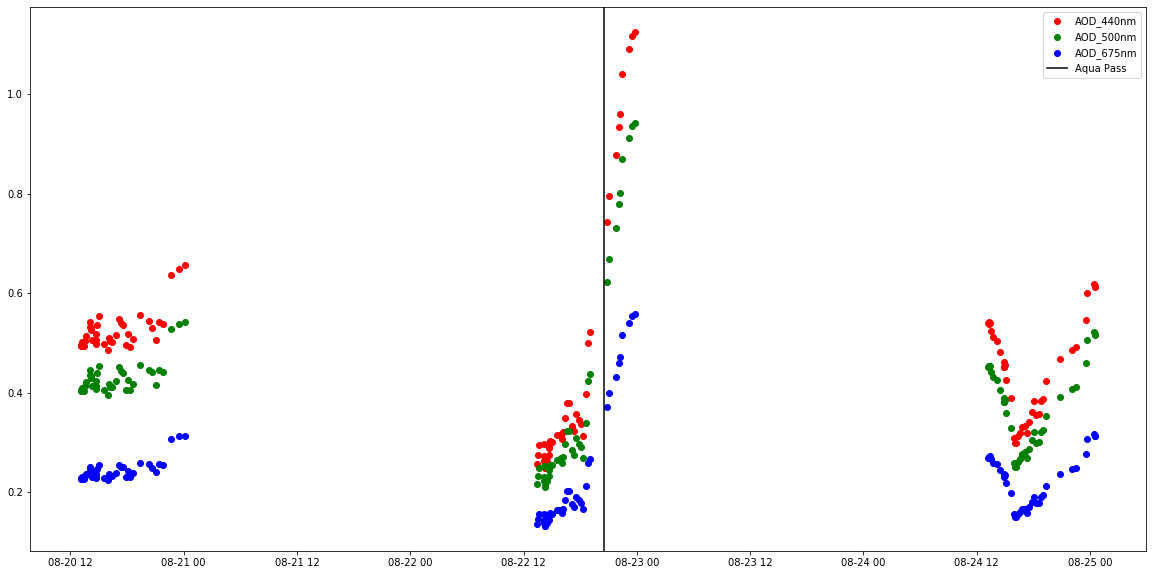

In [4]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.plot('times','AOD_440nm','ro',data=select_df,label='AOD_440nm')
ax.plot('times','AOD_500nm','go',data=select_df,label='AOD_500nm')
ax.plot('times','AOD_675nm','bo',data=select_df,label='AOD_675nm')
# # #'2015-08-20':'2015-08-29' '2015-01-01':'2017-01-01'
# # #ax.axhline(1, );
modis=np.datetime64('2015-08-22T20:30')
ax.axvline(modis, color = 'k', label = 'Aqua Pass');
ax.legend();

The peak may be the Jerusalem Fire in california mid august 2015

In [5]:
aod_files = list(context.data_dir.glob('MYD04*2015234.2030*'))[0]
geom_files = list(context.data_dir.glob('MYD03*2015234.2030*'))[0]
print(aod_files)
print(geom_files)
aod_files = str(aod_files)
geom_file = str(geom_files)

/Users/blairvanandel/repos/atsc448/BV/data/MYD04_3K.A2015234.2030.061.2018052062659.hdf
/Users/blairvanandel/repos/atsc448/BV/data/MYD03.A2015234.2030.061.2018051002627.hdf


reading /Users/blairvanandel/repos/atsc448/BV/data/MYD04_3K.A2015234.2030.061.2018052062659.hdf
reading /Users/blairvanandel/repos/atsc448/BV/data/MYD03.A2015234.2030.061.2018051002627.hdf


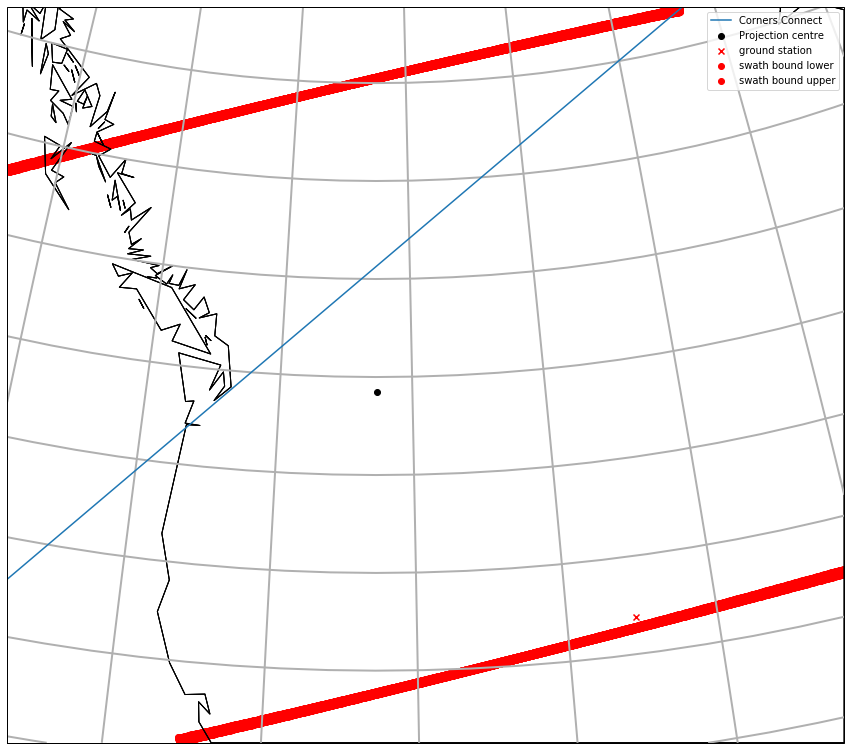

In [6]:
stn_lon = -105.237
stn_lat = 40.125

area_def, lons, lats, metadata, swath_def = get_area_def(aod_files)
plot_geom(geom_file, stn_lon, stn_lat)

The Location of the station is near the souther bound of the swath path, which isn't ideal due to pixel distortion but it will do for now. 

In [7]:
aod_file = SD(aod_files, SDC.READ)
codl_55 = aod_file.select('Corrected_Optical_Depth_Land').get()[1,:,:] # use 55 micron data index 0, 675 index 1
lats = aod_file.select('Latitude').get()
lons = aod_file.select('Longitude').get()
codl = aod_file.select('Corrected_Optical_Depth_Land')
#aod_file.datasets()

In [8]:
hit = codl_55 == codl._FillValue
print(np.sum(hit))
import numpy.ma as ma
codl_55ma = ma.array(codl_55, mask = hit)

202890


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Optical Depth'),
 Text(0.5, 1.0, 'Optical Depth Histogram')]

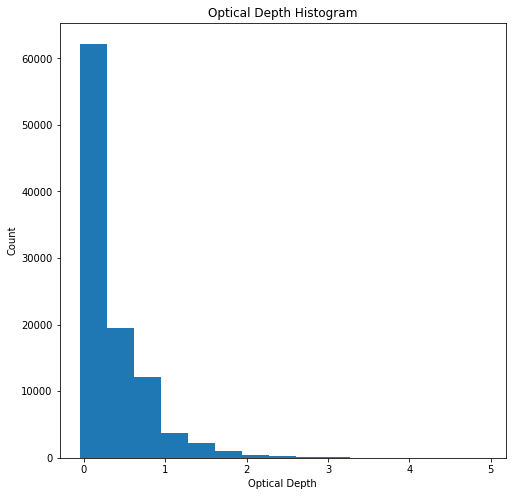

In [9]:
codl = codl_55ma
codl = codl * 0.0010000000474974513
# out=aod_file.select('Scan_Start_Time')
# out.attributes()
codl.shape, area_def.shape, swath_def.shape, lons.shape
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.hist(codl.compressed(), bins=15);
ax.set(title='Optical Depth Histogram', xlabel='Optical Depth', ylabel='Count')

In [10]:
modis_dict = parseMeta(aod_files)

geodetic = ccrs.Geodetic()
geodetic_prj = pyproj.Proj(geodetic.proj4_init)
prj_w = Proj(area_def.proj_dict)
stn_x, stn_y = pyproj.transform(geodetic_prj, prj_w, stn_lon, stn_lat)

stn_x, stn_y

(886235.427870811, -747884.6048333888)

In [11]:
area_name = 'modis swath 5min granule'
image_aod = kd_tree.resample_nearest(swath_def, codl,
                                  area_def, radius_of_influence=5000)

print(f'\ndump area definition:\n{area_def}\n')
print((f'\nx and y pixel dimensions in meters:'
       f'\n{area_def.pixel_size_x}\n{area_def.pixel_size_y}\n'))

codl.shape


dump area definition:
Area ID: laea_otf
Description: On-the-fly laea area
Projection: {'datum': 'WGS84', 'ellps': 'WGS84', 'lat_0': '47.378037612944894', 'lon_0': '-115.64973904257764', 'proj': 'laea', 'x_0': '0.0', 'y_0': '0.0'}
Number of columns: 496
Number of rows: 743
Area extent: (-1246517.7527, -1173110.2431, 1590658.5042, 1324672.0751)


x and y pixel dimensions in meters:
5720.113421318476
3361.7527836071213



(676, 451)

In [12]:
pal = plt.get_cmap("RdYlBu").reversed()
pal.set_bad("0.75")  # 75% grey for np.nan (missing data)
pal.set_over("xkcd:white")  # color cells > vmax white
pal.set_under("xkcd:teal")  # color cells < vmin teal
# vmax = 1.5
# vmin = 0.01
# the_norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)

full_affine = Affine(3000.,0.,0.,0.,-3000.,codl.shape[0])
crs = area_def.to_cartopy_crs()  
stn_col, stn_row = ~full_affine * (stn_x, stn_y)
stn_col, stn_row = int(stn_col), int(stn_row)
print(stn_col, stn_row)

295 249


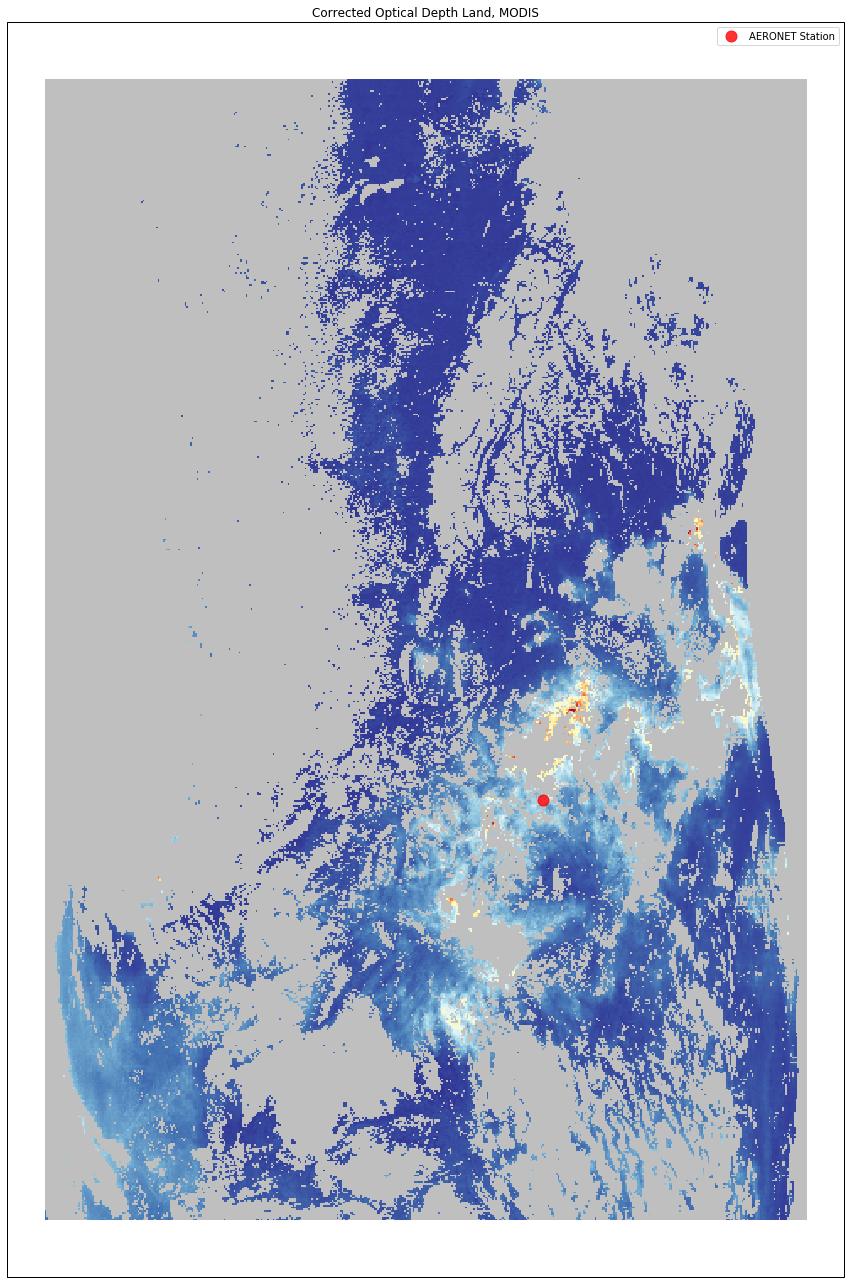

In [13]:
fig, ax = plt.subplots(1, 1,figsize = [15,25], subplot_kw = {'projection': crs})
ax.pcolormesh(codl, cmap=pal)
ax.plot(stn_col, stn_row,'ro',markersize=11, alpha=0.8, label='AERONET Station')
ax.set(title="Corrected Optical Depth Land, MODIS")
ax.legend();
#ax.colorbar()

The plot above is AOD over the region near the ground station. The Grey pixels are masked value that either contain in accurate measurements determined by NASA most likely due to cloud cover. The shaded colours repestent AOD values Measured by MODIS. Light blue being the thinnest Depth and Dark red being the thickest. The large red do is the location of the AERONET measurement site. 

Station AOD is 0.352


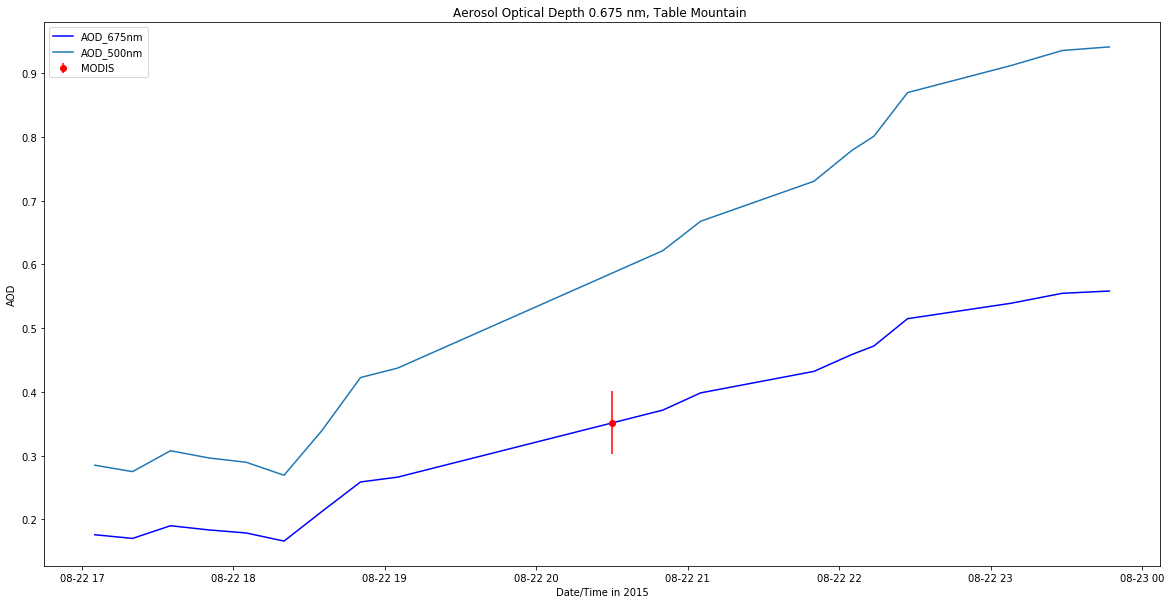

In [14]:
stn_aod = codl[stn_col, stn_row]
print("Station AOD is {0:0.4}".format(stn_aod))

select_df=df.loc['2015-08-22 17:00':'2015-08-23','AOD_675nm':'AOD_440nm']
select_df['times']=select_df.index

fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.plot('times','AOD_675nm', color= 'b', data=select_df,label='AOD_675nm')
ax.plot('times','AOD_500nm',data=select_df,label='AOD_500nm')
#ax.plot('times','AOD_870nm',data=select_df,label='AOD_870nm')
ax.errorbar(modis, stn_aod, yerr = 0.05, fmt='o', color='r', label='MODIS')
ax.set(title='Aerosol Optical Depth 0.675 nm, Table Mountain ', ylabel='AOD', xlabel='Date/Time in 2015')
ax.legend();

MODIS measured value is in line with interpolated line between AERONET points.

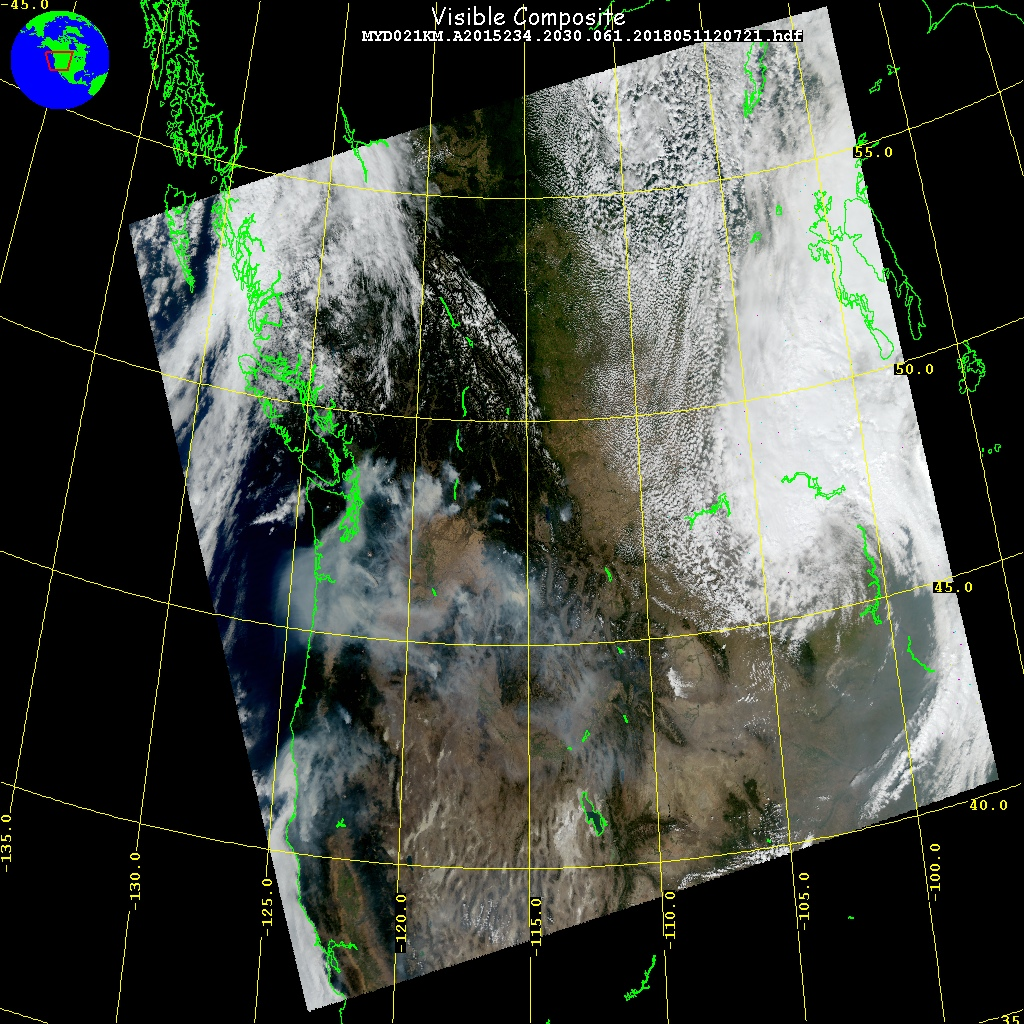

In [15]:
vis_pic = list(context.data_dir.glob('*jpg'))[0]
display(Image(vis_pic))

## Conclusion

The Visible image above shows cloud cover and some smoke but doesnt entirely describe well why there are so many masked values in the MODIS data. 
 
To conclude any results from this paper would be very unwise. Only one data point was produced and its true uncertainty wasn't determined. However the one data point correlated between two measurement sources appears accurate and promising. Not only more data points are required but it would be wise to interpolate the data further and compare measurements from both sources at 0.55 \micro\metre. In future work to narrow the certainty of the data it would be wise track the provided errors provided with the AERONET and MODIS data.


# References

<mark> <b>The bib file biblio.bib was not found

</b> </mark>(<a id="cit-Analysis of the Aerosol" href="#call-Analysis of the Aerosol">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-aeronet dat" href="#call-aeronet dat">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-aeronet helper" href="#call-aeronet helper">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-Comparing Modis" href="#call-Comparing Modis">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-laads" href="#call-laads">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-modis webinar" href="#call-modis webinar">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-master cheif" href="#call-master cheif">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-MODIS Aerosol Algorithm" href="#call-MODIS Aerosol Algorithm">?</a>) !! _This reference was not found in biblio.bib _ !!



# References

<mark> <b>The bib file biblio.bib was not found

</b> </mark>(<a id="cit-Analysis of the Aerosol" href="#call-Analysis of the Aerosol">?</a>) !! _This reference was not found in biblio.bib _ !!

